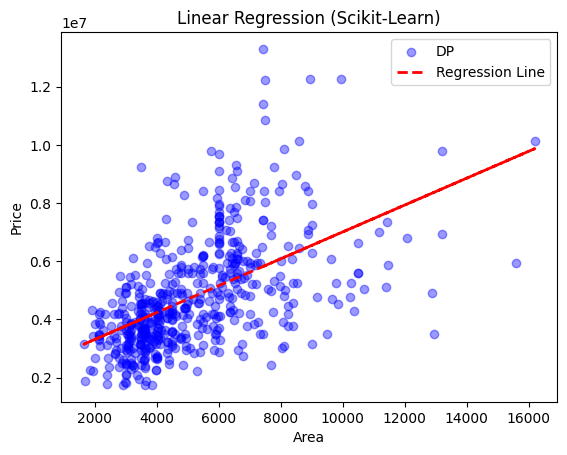

In [24]:
# updated version of question 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
csv_data = pd.read_csv('Housing.csv')
# print(csv_data.head())

# feature selection
x = np.array(csv_data['area']).reshape(-1, 1)
y = np.array(csv_data['price']).reshape(-1,1)

linear_model=LinearRegression()
linear_model.fit(x,y)
y_predicted=linear_model.predict(x)


# plotting
plt.scatter(x, y, color='blue', alpha=0.4, label='DP')
plt.plot(x, y_predicted, 'r--', lw=2, label='Regression Line')
plt.legend()
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression (Scikit-Learn)')
plt.show()

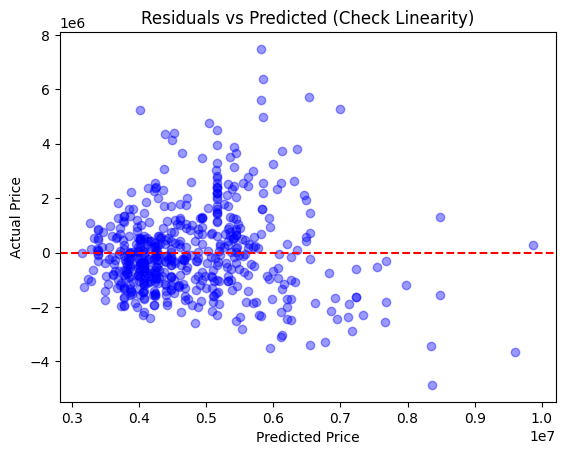

In [ ]:
# 5 assumptions of Linear Regressions
# Linearity
# the relationship between independent (x) and dependent (y) should be linear.

# plotting of residual
residuals=y-y_predicted
plt.scatter(y_predicted,residuals,color='blue',alpha=0.4)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title("Residuals vs Predicted (Check Linearity)")
plt.show()

In [ ]:
# 2. No autocorrelation
# meaning independence of error
# residuals should be independent
# we can check it using Durbin-Watson test
# from statsmodels.stats.statstools import durbin_watson
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(residuals))
# value close to 2: no correlation
# value<1 or value>3 : high correlations

[0.56483123]


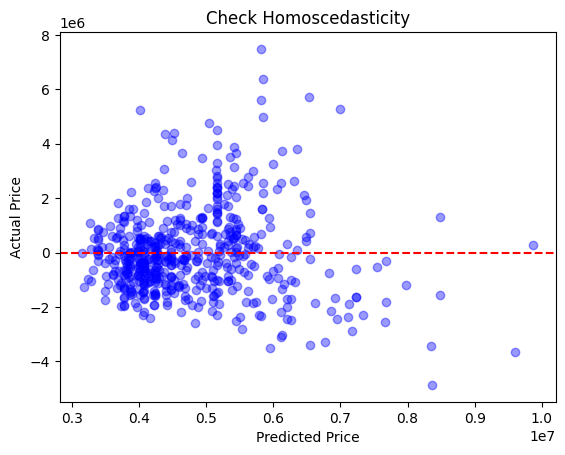

In [29]:
# 3. Homoscedasticity (Equal variance of residuals)
# variance can't be too much high for  value
plt.scatter(y_predicted, residuals, color='blue', alpha=0.4)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title("Check Homoscedasticity")
plt.show()

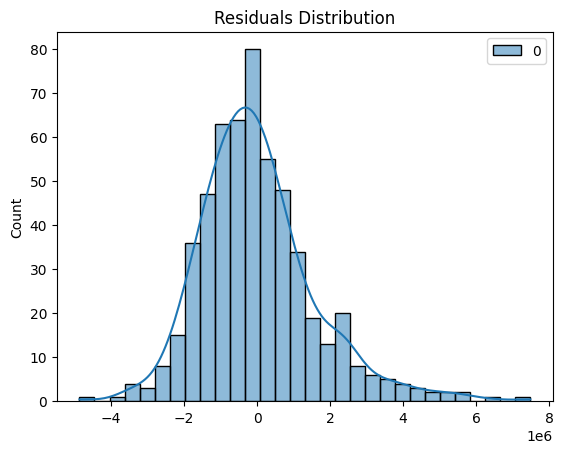

In [32]:
# 4. Normality of Erros
# Erros should be normally distributed
import seaborn as sns
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

In [ ]:
# 5. Multicollinerality
# for single features like 'area-price' multicollinerity is always 1
# VIF is good when we have multiple features